### __DATA UNDERSTANDING__

In [1]:
import pandas as pd

In [2]:
# Mengambil dataset serta menampilkan 5 teratas dari dataset
titanic_df = pd.read_csv("titanic_2.csv")
titanic_df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Mengecek Missing Value
titanic_df .isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Memeriksa tipe data serta statistik deskriptif dari dataset
print (titanic_df.info())
print(40 * '=')
print (titanic_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

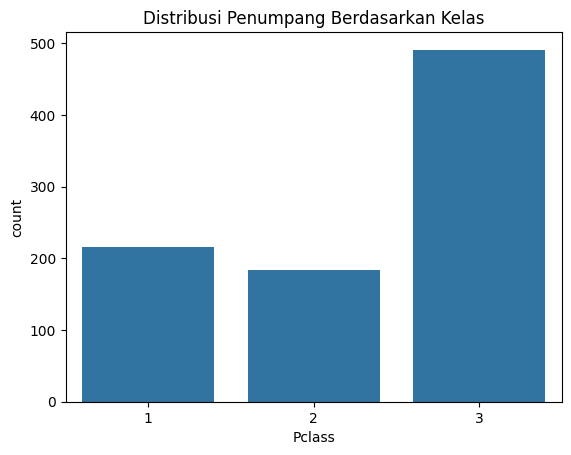

In [5]:
# Pendistribusian penumpang berdasarkan kelas
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi kelas penumpang
sns.countplot(data=titanic_df, x='Pclass')
plt.title('Distribusi Penumpang Berdasarkan Kelas')
plt.show()

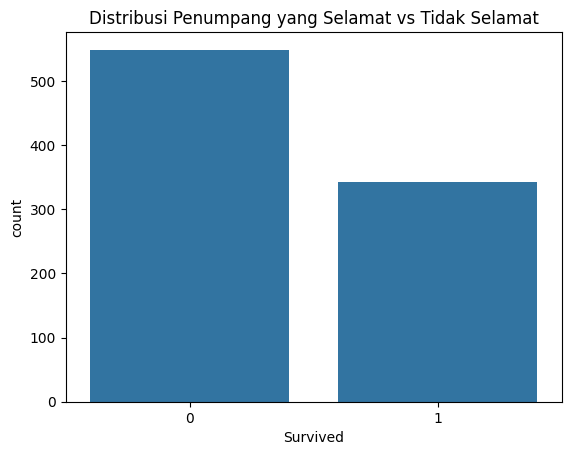

In [6]:
# Pendistribusian penumpang yang selamat dan tidak selamat
sns.countplot(data=titanic_df, x='Survived')
plt.title('Distribusi Penumpang yang Selamat vs Tidak Selamat')
plt.show()

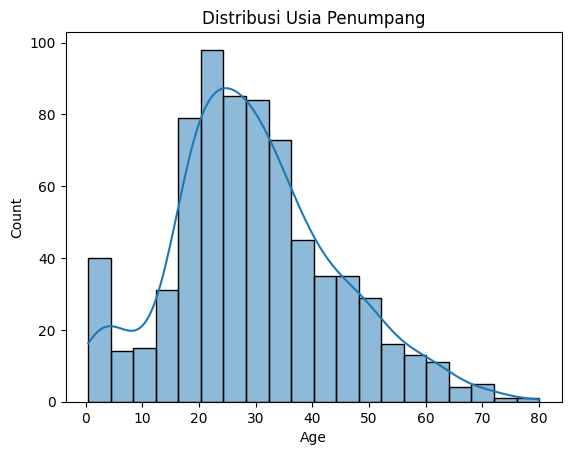

In [7]:
# Plot distribusi usia penumpang
sns.histplot(titanic_df['Age'], bins=20, kde=True)
plt.title('Distribusi Usia Penumpang')
plt.show()

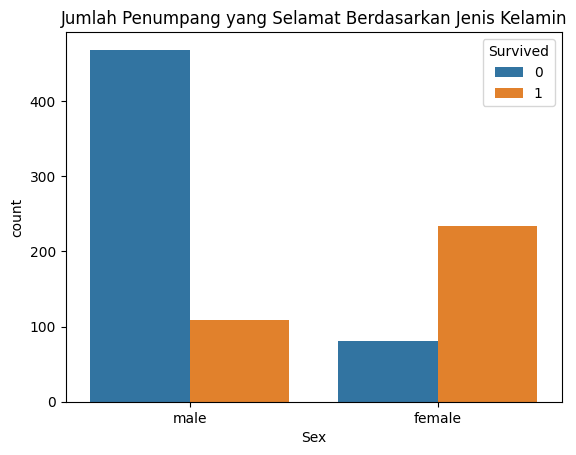

In [8]:
# Jumlah penumpang yang selamat berdasarkan jenis kelamin
sns.countplot(data=titanic_df, x='Sex', hue='Survived')
plt.title('Jumlah Penumpang yang Selamat Berdasarkan Jenis Kelamin')
plt.show()

In [9]:
# Mengonversi kolom 'Sex' (jenis kelamin) dari string ke numerik (0 untuk male, 1 untuk female)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Memeriksa apakah konversi berhasil
print(titanic_df['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


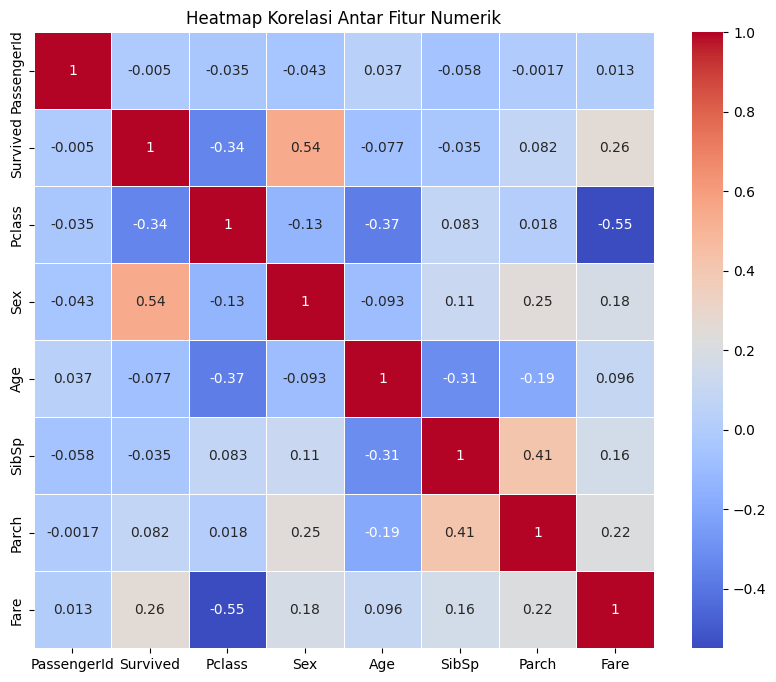

In [10]:
# Melihat korelasi antar variabel numerik
correlation_matrix = titanic_df.corr(numeric_only=True)

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


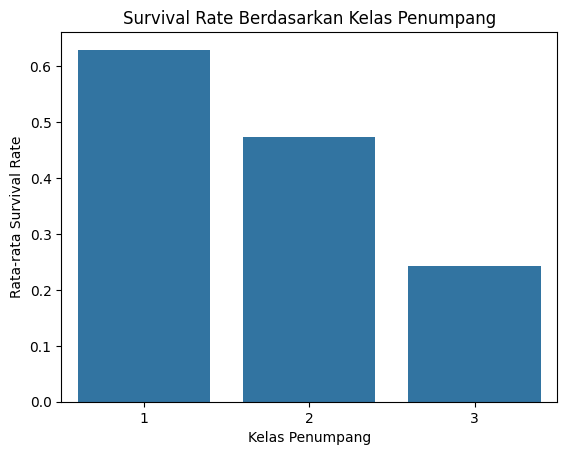

In [11]:
# Melihat survival rate berdasarkan kelas penumpang
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean()

print(survival_by_class)

# Visualisasi survival rate berdasarkan kelas
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rate Berdasarkan Kelas Penumpang')
plt.ylabel('Rata-rata Survival Rate')
plt.xlabel('Kelas Penumpang')
plt.show()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


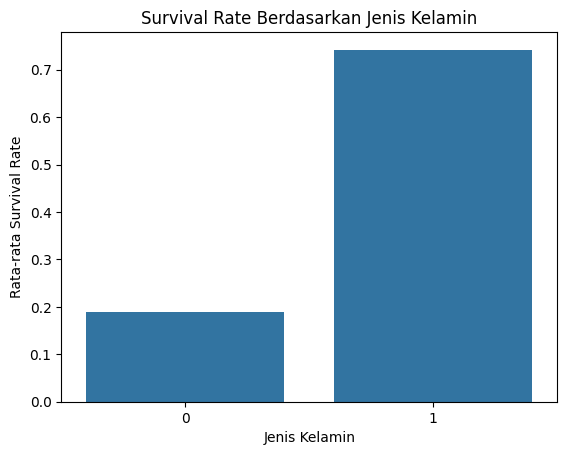

In [12]:
# Survival rate berdasarkan jenis kelamin
survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()

print(survival_by_gender)

# Visualisasi survival rate berdasarkan jenis kelamin
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival Rate Berdasarkan Jenis Kelamin')
plt.ylabel('Rata-rata Survival Rate')
plt.xlabel('Jenis Kelamin')
plt.show()

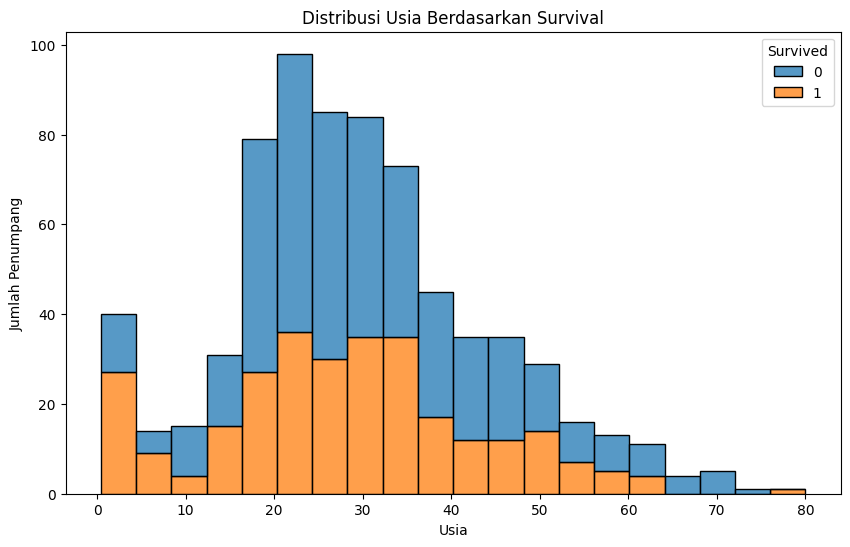

In [13]:
# Membuat distribusi usia untuk penumpang yang selamat vs tidak selamat
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack', kde=False, bins=20)
plt.title('Distribusi Usia Berdasarkan Survival')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.show()

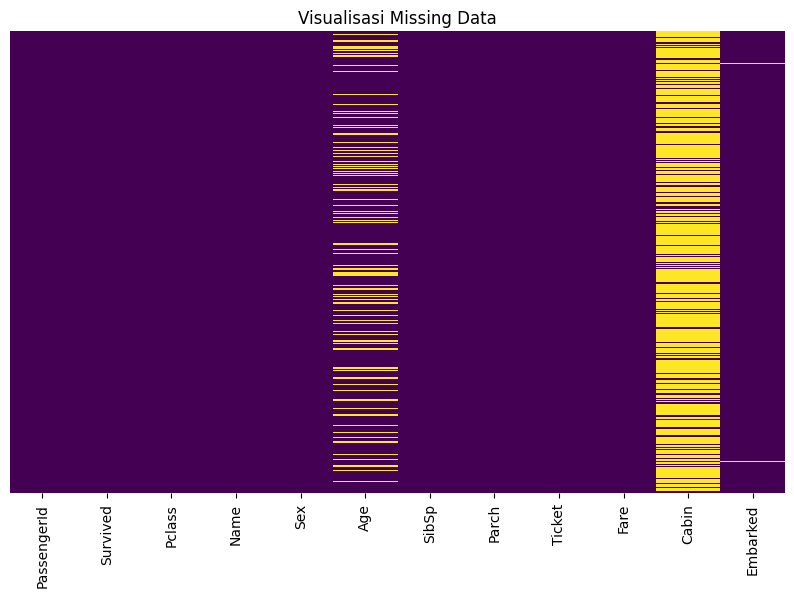

In [14]:
# Visualisasi missing values dalam dataset menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualisasi Missing Data')
plt.show()

### __DATA PREPARATION__

In [15]:
object_columns = titanic_df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Name', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [16]:
titanic_df = titanic_df.drop(columns = ["PassengerId", "Name", "Cabin", "Ticket"])
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


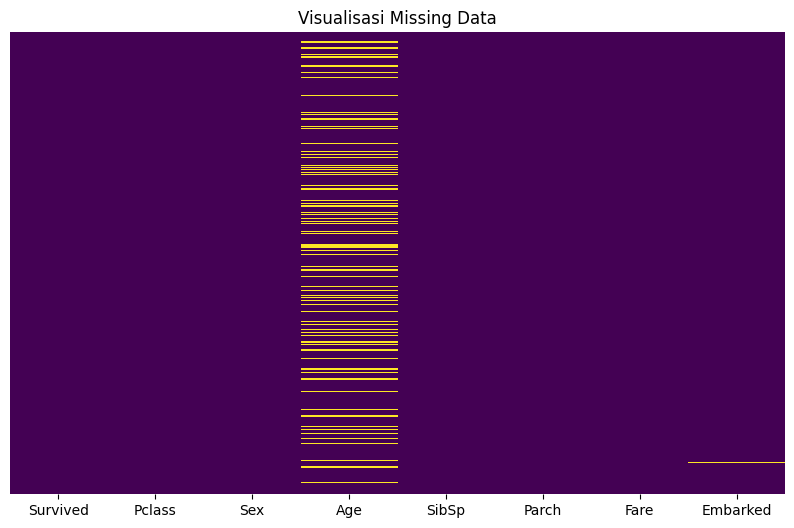

In [17]:
# Visualisasi missing values dalam dataset menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualisasi Missing Data')
plt.show()

In [18]:
titanic_df.dropna(inplace=True)

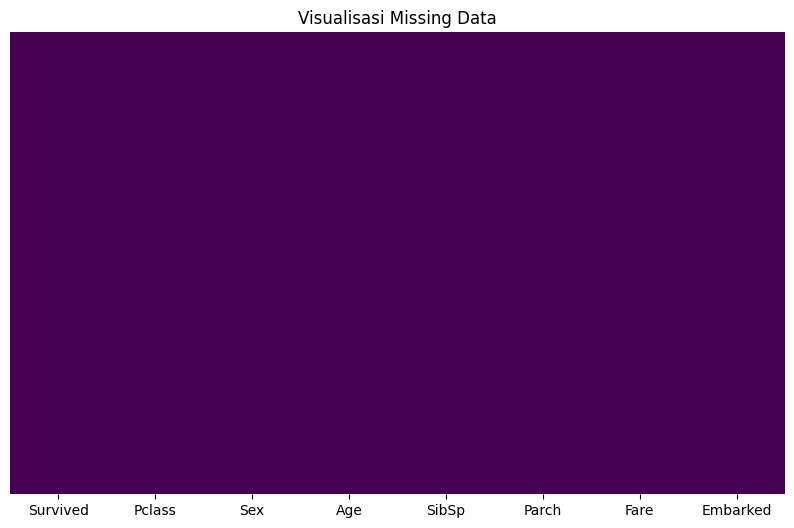

In [19]:
# Visualisasi missing values dalam dataset menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualisasi Missing Data')
plt.show()

In [20]:
# Membuat fitur 'FamilySize'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1  # +1 untuk diri sendiri

# Membuat fitur 'IsAlone'
titanic_df['IsAlone'] = 1  # Awalnya, kita set bahwa semua penumpang sendirian
titanic_df.loc[titanic_df['FamilySize'] > 1, 'IsAlone'] = 0  # Jika FamilySize lebih dari 1, artinya tidak sendirian

# Memeriksa hasil pembuatan fitur baru
print(titanic_df[['FamilySize', 'IsAlone']].head())

   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


In [21]:
from sklearn.preprocessing import StandardScaler

# Fitur yang akan di-standarisasi
features_to_scale = ['Age', 'Fare', 'FamilySize']

# Membuat objek scaler
scaler = StandardScaler()

# Menerapkan scaler pada kolom fitur yang dipilih
titanic_df[features_to_scale] = scaler.fit_transform(titanic_df[features_to_scale])

# Memeriksa hasil standarisasi
print(titanic_df[features_to_scale].head())

        Age      Fare  FamilySize
0 -0.527669 -0.516380    0.035965
1  0.577094  0.694046    0.035965
2 -0.251478 -0.503620   -0.637897
3  0.369951  0.350326    0.035965
4  0.369951 -0.501257   -0.637897


In [22]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memeriksa bentuk (shape) data latih dan data uji
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (569, 9)
X_test shape: (143, 9)
y_train shape: (569,)
y_test shape: (143,)


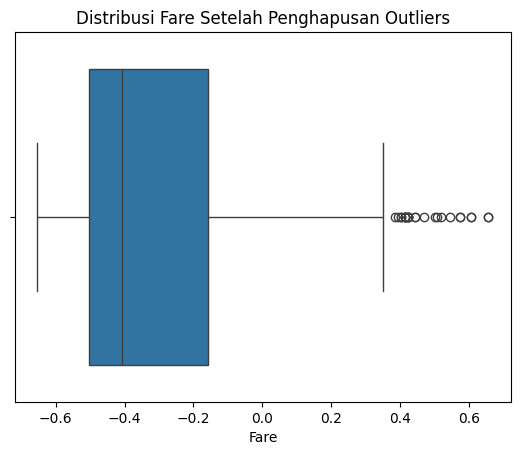

In [23]:
# Menghitung nilai IQR
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers
titanic_df = titanic_df[(titanic_df['Fare'] >= lower_bound) & (titanic_df['Fare'] <= upper_bound)]

# Memeriksa distribusi kolom Fare setelah penghapusan outliers
sns.boxplot(x=titanic_df['Fare'])
plt.title('Distribusi Fare Setelah Penghapusan Outliers')
plt.show()

In [24]:
# Menggunakan One-Hot Encoding untuk kolom 'Embarked'
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

In [25]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,0,3,0,-0.527669,1,0,-0.516380,0.035965,0,False,True
2,1,3,1,-0.251478,0,0,-0.503620,-0.637897,1,False,True
3,1,1,1,0.369951,1,0,0.350326,0.035965,0,False,True
4,0,3,0,0.369951,0,0,-0.501257,-0.637897,1,False,True
6,0,1,0,1.681856,0,0,0.326933,-0.637897,1,False,True


### __MODELLING__

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
# Asumsi bahwa titanic_df adalah dataset yang telah melalui data preparation
# Fitur (X) dan target (y)
X = titanic_df.drop(columns=['Survived'])  # Survived adalah target kita
y = titanic_df['Survived']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memeriksa bentuk data latih dan uji
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (493, 10)
X_test shape: (124, 10)


##### __1. Linear Regression__

In [28]:
# Membuat model Linear Regression
linear_model = LinearRegression()

# Melatih model menggunakan data latih
linear_model.fit(X_train, y_train)

# Memprediksi menggunakan data uji
y_pred_linear = linear_model.predict(X_test)

# Mengonversi hasil prediksi ke biner (0 atau 1) dengan threshold 0.5
y_pred_linear_bin = np.where(y_pred_linear >= 0.5, 1, 0)

# Mengevaluasi akurasi model
print("Akurasi Linear Regression:", accuracy_score(y_test, y_pred_linear_bin))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear_bin))
print("Classification Report:\n", classification_report(y_test, y_pred_linear_bin))


Akurasi Linear Regression: 0.782258064516129
Confusion Matrix:
 [[73 12]
 [15 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        85
           1       0.67      0.62      0.64        39

    accuracy                           0.78       124
   macro avg       0.75      0.74      0.74       124
weighted avg       0.78      0.78      0.78       124



##### __2. Logistic Resression__

In [29]:
# Membuat model Logistic Regression
logistic_model = LogisticRegression()

# Melatih model menggunakan data latih
logistic_model.fit(X_train, y_train)

# Memprediksi menggunakan data uji
y_pred_logistic = logistic_model.predict(X_test)

# Mengevaluasi akurasi model
print("Akurasi Logistic Regression:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Akurasi Logistic Regression: 0.7903225806451613
Confusion Matrix:
 [[73 12]
 [14 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        85
           1       0.68      0.64      0.66        39

    accuracy                           0.79       124
   macro avg       0.76      0.75      0.75       124
weighted avg       0.79      0.79      0.79       124



##### __3. KNN__

In [30]:
# Membuat model KNN dengan k=5 (jumlah tetangga)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data latih
knn_model.fit(X_train, y_train)

# Memprediksi menggunakan data uji
y_pred_knn = knn_model.predict(X_test)

# Mengevaluasi akurasi model
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Akurasi KNN: 0.75
Confusion Matrix:
 [[67 18]
 [13 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81        85
           1       0.59      0.67      0.63        39

    accuracy                           0.75       124
   macro avg       0.71      0.73      0.72       124
weighted avg       0.76      0.75      0.75       124

